#### Goals
- Implement the model that will find insights from data
- Categorise the data into segments and derive insight from that
- In this one using K-Means

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# first on randomly generated data for practice
import random
np.random.seed(0)

In [20]:
from sklearn.datasets._samples_generator import make_blobs
x, y = make_blobs(n_samples=5000, centers=[[6, 6], [-3, -1], [3, -5], [1, 1]], cluster_std=0.9)
print(x)
print(x[:,0])
print(x[:,1])

[[-2.44146058 -1.28636726]
 [ 3.24262248 -4.26261105]
 [ 0.73985915  1.55942407]
 ...
 [-0.38408215  0.1048729 ]
 [ 0.90206622  0.2282428 ]
 [ 0.98513841 -0.26200732]]
[-2.44146058  3.24262248  0.73985915 ... -0.38408215  0.90206622
  0.98513841]
[-1.28636726 -4.26261105  1.55942407 ...  0.1048729   0.2282428
 -0.26200732]


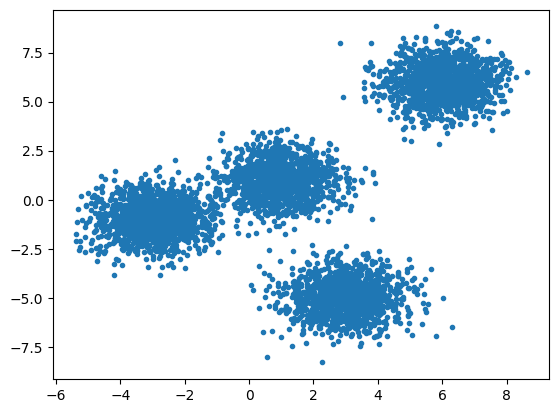

In [18]:
# Plotting the random sample with  four centers
plt.scatter(x[:,0], x[:,1], marker='.')

In [27]:
# Model intialization
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [31]:
y_hat = k_means.fit_predict(x)

In [32]:
# labels from k means
k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 1, ..., 1, 1, 1], dtype=int32)

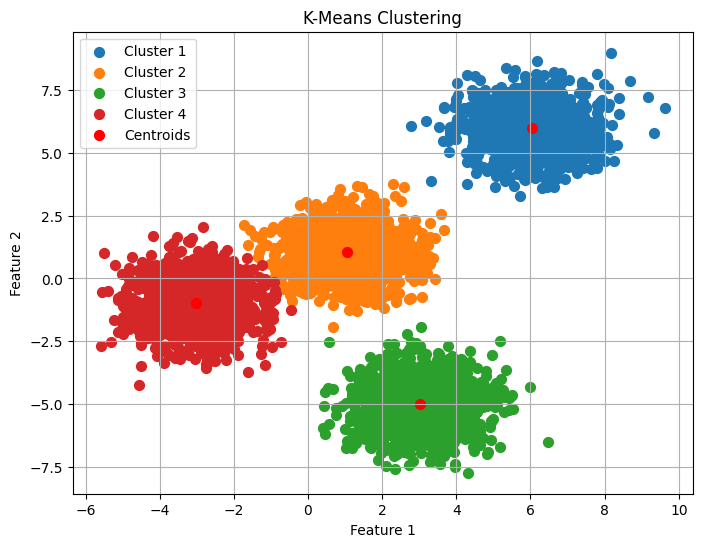

In [34]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

for cluster_id in range(k_means.n_clusters):
    plt.scatter(x[y_hat == cluster_id, 0], x[y_hat == cluster_id, 1], label=f"Cluster {cluster_id + 1}", s = 50)

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=200, c="red", label= "Centroids", marker='.')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

In [36]:
# customer segmentation with K-Means
cust_df = pd.read_csv("./datasets/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [42]:
cust_df.dtypes
print(cust_df.shape)
print(cust_df['Address'].unique())
print(cust_df.info())
print(cust_df.describe())

(850, 10)
['NBA001' 'NBA021' 'NBA013' 'NBA009' 'NBA008' 'NBA016' 'NBA006' 'NBA011'
 'NBA010' 'NBA003' 'NBA000' 'NBA019' 'NBA005' 'NBA004' 'NBA022' 'NBA018'
 'NBA002' 'NBA007' 'NBA026' 'NBA020' 'NBA012' 'NBA014' 'NBA024' 'NBA015'
 'NBA017' 'NBA023' 'NBA025' 'NBA027' 'NBA031' 'NBA030' 'NBA034' 'NBA029']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)


In [ ]:
# Remove address or change it to int labels
# Plot the graph - but with which feature?
# In K means algo it generally calculates the ecuclidean distance
# so keep the feature that is relevant to calculating distance and drop other features

In [45]:
# dropping the address label
df = cust_df.drop("Address", axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [49]:
# Normalizing the dataset
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
clus_dataset = StandardScaler().fit_transform(x)
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [51]:
# Creating the K means model
clus_num = 3
k_means = KMeans(init="k-means++", n_clusters=clus_num, n_init=12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [53]:
# Assigning labels to dataframe
df["clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [56]:
# Centroid value of each cluster based on the different feature
df.groupby("clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


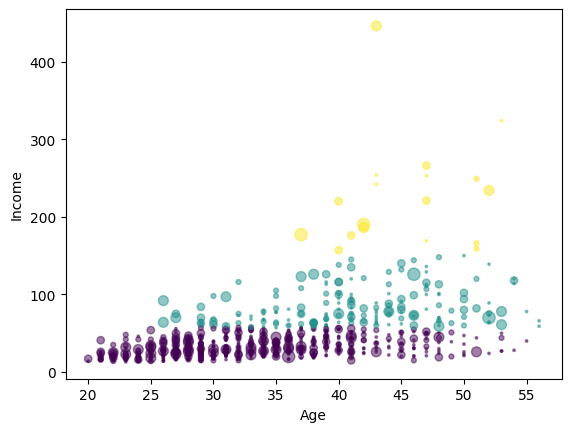

In [65]:
# Plotting the distribution between customer based on their age and income
area = np.pi * (x[:,1])**2
plt.scatter(x[:, 0], x[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]


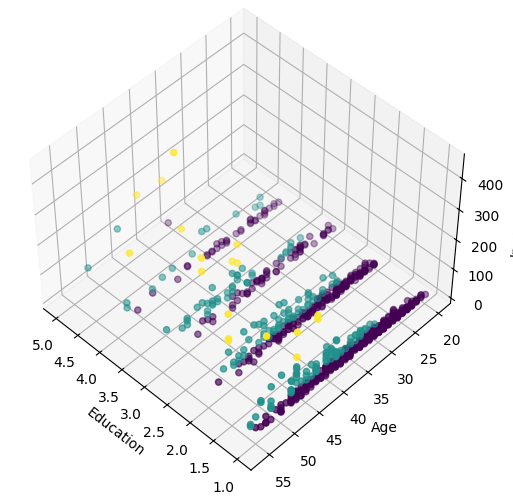

In [68]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection= "3d", elev=48, azim= 134)

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
print(x)
ax.scatter(x[:, 1], x[:, 0], x[:,3], c= labels.astype(float), cmap='viridis')
plt.show()

#### Summary
Implemented K-Means cluster algorithm to find insights in historical customer data
Learned:
- K-Means Cluster algorithm
- Data visualization and 3D plots
- Insights - How customer group varies with age, education and income


In [69]:
print("The End!")

The End!
